In [0]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [131]:
from google.colab import drive
drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/BE Air Quality Monitoring/Implementation/Prophet/somaiya.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
df=pd.read_csv(path) 
print(df)

         Date  ...                                           pregnant
0    31-10-19  ...  To keep you and your baby healthy, reduce the ...
1    31-10-19  ...  To keep you and your baby healthy, reduce the ...
2    31-10-19  ...  To keep you and your baby healthy, reduce the ...
3    01-11-19  ...  To keep you and your baby healthy, reduce the ...
4    01-11-19  ...  To keep you and your baby healthy, reduce the ...
..        ...  ...                                                ...
499  21-11-19  ...  The current level of air quality is likely to ...
500  21-11-19  ...  The current level of air quality is likely to ...
501  21-11-19  ...  The current level of air quality is likely to ...
502  21-11-19  ...  The current level of air quality is likely to ...
503  21-11-19  ...  The current level of air quality is likely to ...

[504 rows x 25 columns]


In [133]:
for ind in df.index:
	string=df['Date'][ind]
	string = string[:6]+"20"+string[6:]
	string = string[6:]+"-"+string[3:5]+"-"+string[0:2]
	dat=datetime.strptime(string,'%Y-%m-%d').date()
	time=datetime.strptime(df['Timestamp'][ind],'%H:%M:%S').time()
	timestamp = datetime.combine(dat,time)
	df['Date'][ind]=timestamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
print(df['Date'])

0      2019-10-31 21:00:00
1      2019-10-31 22:00:00
2      2019-10-31 23:00:00
3      2019-11-01 00:00:00
4      2019-11-01 01:00:00
              ...         
499    2019-11-21 14:00:00
500    2019-11-21 15:00:00
501    2019-11-21 16:00:00
502    2019-11-21 17:00:00
503    2019-11-21 18:00:00
Name: Date, Length: 504, dtype: object


In [0]:
df.rename(columns = {'Date':'ds'}, inplace = True)
df.rename(columns = {'CO':'y'}, inplace = True)

In [136]:
train=df[0:432]
test=df[432:]
print(train)
print(test)

                      ds  ...                                           pregnant
0    2019-10-31 21:00:00  ...  To keep you and your baby healthy, reduce the ...
1    2019-10-31 22:00:00  ...  To keep you and your baby healthy, reduce the ...
2    2019-10-31 23:00:00  ...  To keep you and your baby healthy, reduce the ...
3    2019-11-01 00:00:00  ...  To keep you and your baby healthy, reduce the ...
4    2019-11-01 01:00:00  ...  To keep you and your baby healthy, reduce the ...
..                   ...  ...                                                ...
427  2019-11-18 14:00:00  ...  The current level of air quality is likely to ...
428  2019-11-18 15:00:00  ...  The current level of air quality is likely to ...
429  2019-11-18 16:00:00  ...  The current level of air quality is likely to ...
430  2019-11-18 17:00:00  ...  The current level of air quality is likely to ...
431  2019-11-18 18:00:00  ...  The current level of air quality is likely to ...

[432 rows x 25 columns]
   

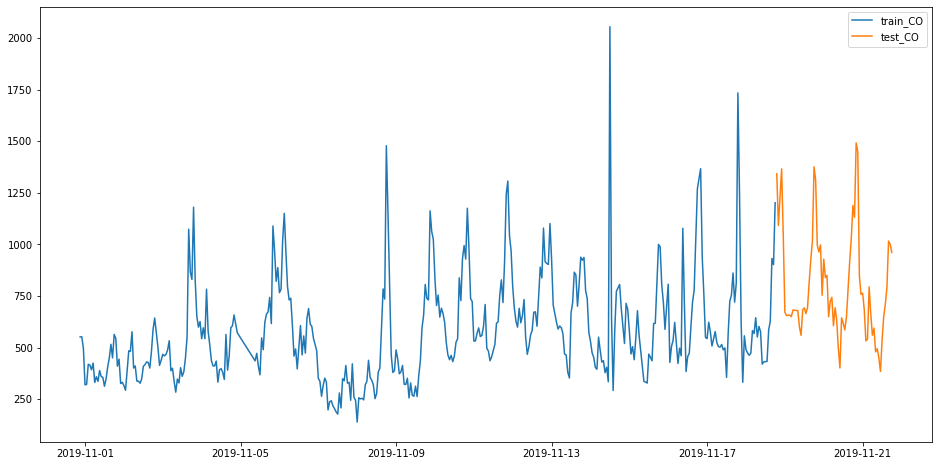

In [137]:
plt.figure(figsize=(16,8))
plt.plot(train['ds'],train['y'],label='train_CO')
plt.plot(test['ds'],test['y'],label='test_CO')
plt.legend()

In [138]:
m = Prophet().fit(train)
future = m.make_future_dataframe(periods=72, freq='H')
fcst = m.predict(future)
print(fcst)
print(fcst.T) #Transpose

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     ds       trend  ...  multiplicative_terms_upper        yhat
0   2019-10-31 21:00:00  449.094927  ...                         0.0  470.387668
1   2019-10-31 22:00:00  449.699031  ...                         0.0  390.116557
2   2019-10-31 23:00:00  450.303134  ...                         0.0  328.766418
3   2019-11-01 00:00:00  450.907238  ...                         0.0  295.696960
4   2019-11-01 01:00:00  451.511341  ...                         0.0  284.928803
..                  ...         ...  ...                         ...         ...
499 2019-11-21 14:00:00  714.103391  ...                         0.0  488.503905
500 2019-11-21 15:00:00  714.476388  ...                         0.0  544.147721
501 2019-11-21 16:00:00  714.849384  ...                         0.0  627.936296
502 2019-11-21 17:00:00  715.222381  ...                         0.0  726.648178
503 2019-11-21 18:00:00  715.595377  ...                         0.0  807.790516

[504 rows x 19 columns]
   

In [139]:
forecast=fcst[432:]
print(forecast)

                     ds       trend  ...  multiplicative_terms_upper        yhat
432 2019-11-18 19:00:00  689.112625  ...                         0.0  972.887957
433 2019-11-18 20:00:00  689.485621  ...                         0.0  942.868722
434 2019-11-18 21:00:00  689.858618  ...                         0.0  870.726047
435 2019-11-18 22:00:00  690.231614  ...                         0.0  790.055453
436 2019-11-18 23:00:00  690.604611  ...                         0.0  728.655173
..                  ...         ...  ...                         ...         ...
499 2019-11-21 14:00:00  714.103391  ...                         0.0  488.503905
500 2019-11-21 15:00:00  714.476388  ...                         0.0  544.147721
501 2019-11-21 16:00:00  714.849384  ...                         0.0  627.936296
502 2019-11-21 17:00:00  715.222381  ...                         0.0  726.648178
503 2019-11-21 18:00:00  715.595377  ...                         0.0  807.790516

[72 rows x 19 columns]


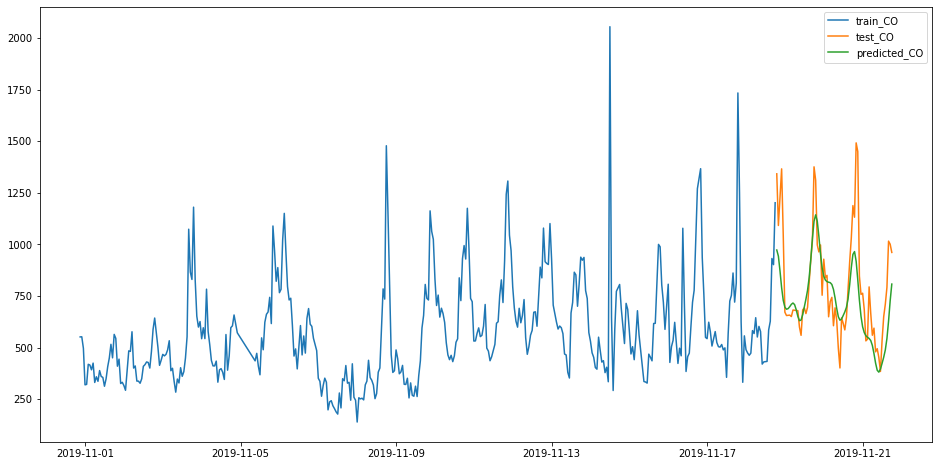

In [140]:
plt.figure(figsize=(16,8))
plt.plot(train['ds'],train['y'],label='train_CO')
plt.plot(test['ds'],test['y'],label='test_CO')
plt.plot(forecast['ds'],forecast['yhat'],label='predicted_CO')
plt.legend()

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [143]:
mean_absolute_percentage_error(test['y'], forecast['yhat'])

15.027831372486702